# Tasks

[https://moodle.ost.ch/pluginfile.php/426498/mod_resource/content/1/AiAp23_MiniProj1.pdf](https://moodle.ost.ch/pluginfile.php/426498/mod_resource/content/1/AiAp23_MiniProj1.pdf)

---

# Miniproject 1 
# B.I. Bartificial Intelligence - Image Classifier for *The Simpsons*
![](https://static.wikia.nocookie.net/simpsons/images/8/8c/Treehouse_of_Horror_XVI_%28Promo_Picture%29_2.jpg/revision/latest?cb=20120625110202) |  ![](https://static.wikia.nocookie.net/simpsons/images/a/a9/B.I._Bartificial_Intelligence.jpg/revision/latest?cb=20121103214906)
:---:|:---:

> Authors 🗒
> * Kyra Maag (kyra.maag@ost.ch)
> * Nico Fehr (nico.fehr@ost.ch)

For the first Miniproject we decided to train an image classifier for images of characters from the famous series "The Simpsons". The classifier can detect and predict the character shown on a given image.




## Dataset
### Source
The dataset used in this miniproject was available on kaggle.com. The dataset contains 20 folders (one per each character in the series) with around 400-2000 images in each one.

We reduced the dataset significantly to only work with 8 classes which will make the training faster.

### Key characteristics

## Architecture 1 (simple, underfitted)

### Tasks
* [ ] Define and train deep convolutional network (multi-class) with keras
* [x] Not more than 3 layers, no more than 5'000 trainable parameters
* [x] Network should underfit
* [ ] Plot loss and accuracy evolvement
* [ ] sufficient nr of epochs
* [ ] training loss should converge
* [ ] Plot confusion matrix
* [ ] Discussion

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [3]:
classification_labels = ["Bart Simpson",
          "Charles Montgomery Burns",
          "Homer Simpson",
          "Krusty The Clown",
          "Lisa Simpson",
          "Marge Simpson",
          "Moe Szyslak",
          "Ned Flanders",]

In [4]:
train_directory = 'simpsons-dataset/train'
test_directory = 'simpsons-dataset/test'

In [37]:
image_size = (50, 50)
batch_size = 128

train_data, validation_data = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    validation_split=0.2,
    subset='both',
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    color_mode='rgb',
    labels='inferred',
    label_mode='int',
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    image_size=image_size,
    batch_size=batch_size,
    color_mode='rgb',
    labels='inferred',
    label_mode='int'
)

Found 11538 files belonging to 8 classes.
Using 9231 files for training.
Using 2307 files for validation.
Found 397 files belonging to 8 classes.


### Exploring the data

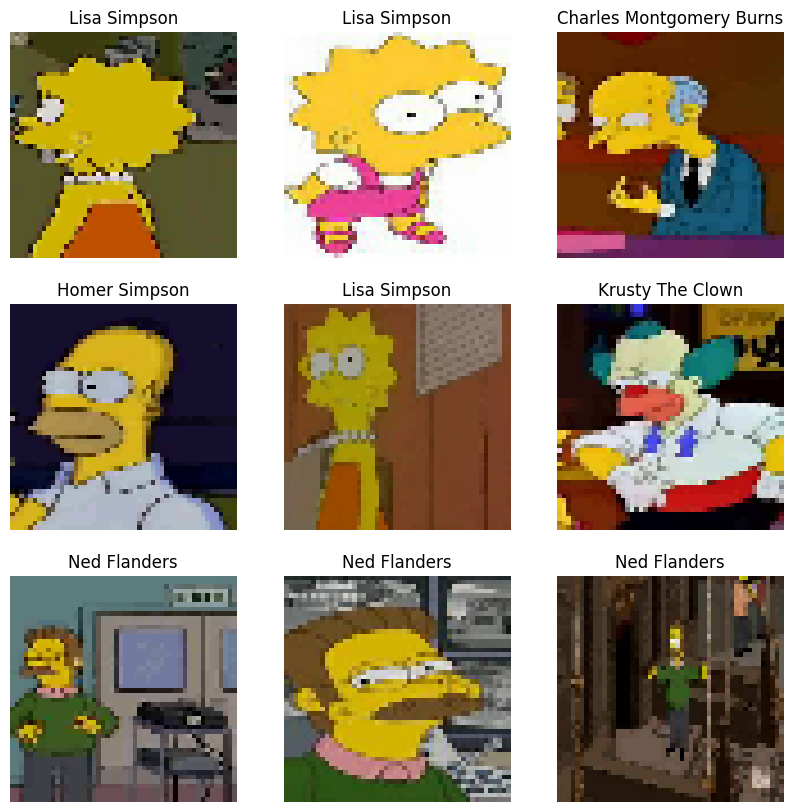

In [38]:
plt.figure(figsize=(10,10))

for images, labels in train_data.take(1):
  for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(classification_labels[int(labels[i])])
      plt.axis("off")


### Rescaling Layer

Performance

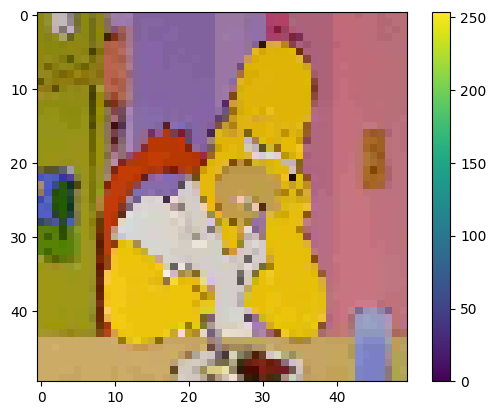

In [10]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

for images, labels in train_data.take(1):
    plt.figure()
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [11]:
input_shape = image_size + (3, )
print(input_shape)
num_classes = len(classification_labels)

(50, 50, 3)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 2)         56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 2)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 5)         95        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 5)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 605)               0

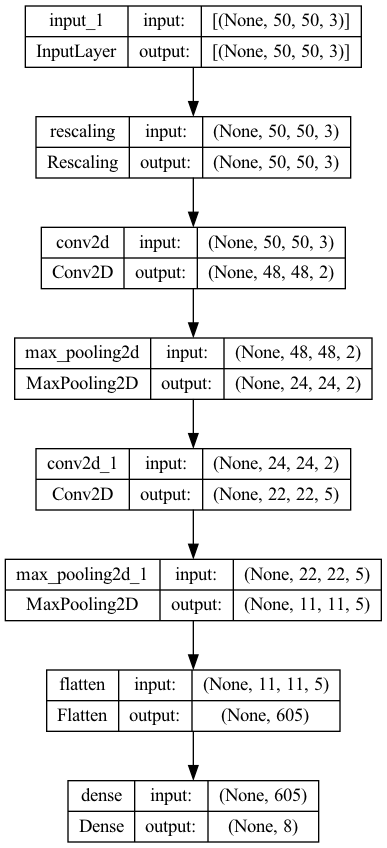

In [12]:
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Rescaling(1./255),
    layers.Conv2D(2, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(5, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(num_classes),
])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

In [13]:
#callbacks = [
#    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
#]

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [14]:
epochs = 25
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=epochs,
    #callbacks=callbacks
)

Epoch 1/25
73/73 [==============================] - 6s 59ms/step - loss: 2.0513 - accuracy: 0.2068 - val_loss: 2.0029 - val_accuracy: 0.2466
Epoch 2/25
73/73 [==============================] - 3s 41ms/step - loss: 1.8790 - accuracy: 0.3045 - val_loss: 1.8067 - val_accuracy: 0.3442
Epoch 3/25
73/73 [==============================] - 3s 41ms/step - loss: 1.6967 - accuracy: 0.3974 - val_loss: 1.6525 - val_accuracy: 0.4326
Epoch 4/25
73/73 [==============================] - 3s 41ms/step - loss: 1.5582 - accuracy: 0.4539 - val_loss: 1.5610 - val_accuracy: 0.4586
Epoch 5/25
73/73 [==============================] - 3s 42ms/step - loss: 1.4922 - accuracy: 0.4798 - val_loss: 1.5269 - val_accuracy: 0.4772
Epoch 6/25
73/73 [==============================] - 3s 41ms/step - loss: 1.4643 - accuracy: 0.4895 - val_loss: 1.4989 - val_accuracy: 0.4937
Epoch 7/25
73/73 [==============================] - 3s 43ms/step - loss: 1.4442 - accuracy: 0.4958 - val_loss: 1.4859 - val_accuracy: 0.5041
Epoch 8/25
73

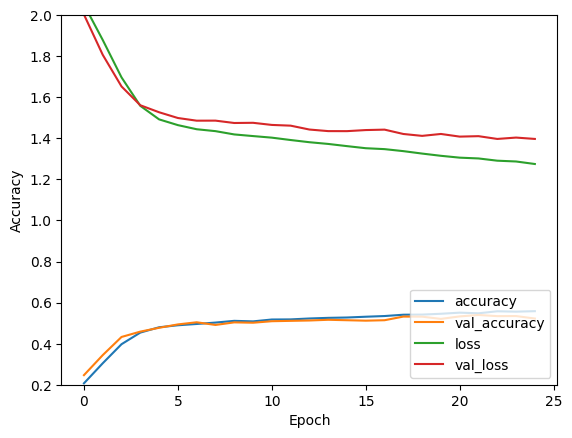

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 2])
plt.legend(loc='lower right')

In [17]:
test_loss, test_accuracy = model.evaluate(test_data, verbose=2)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/flatten/Reshape' defined at (most recent call last):
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 595, in run_forever
      self._run_once()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 1881, in _run_once
      handle._run()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/1z/7996ycgj5jx7l2ds3wck5k_c0000gn/T/ipykernel_3818/4239312353.py", line 1, in <module>
      test_loss, test_accuracy = model.evaluate(test_data, verbose=2)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/engine/training.py", line 2040, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1820, in test_function
      return step_function(self, iterator)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1804, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1792, in run_step
      outputs = model.test_step(data)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1756, in test_step
      y_pred = self(x, training=False)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/nico/PycharmProjects/AIMiniProj1/venv/lib/python3.10/site-packages/keras/layers/reshaping/flatten.py", line 104, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential/flatten/Reshape'
Input to reshape is a tensor with 615040 values, but the requested shape requires a multiple of 605
	 [[{{node sequential/flatten/Reshape}}]] [Op:__inference_test_function_11870]

## Architecture 2 (overfitted)
### Tasks

* [ ] Change number of layers, filters (=kernels), number of neurons
* [ ] Make network too complex (overfitting)
* [ ] Plot learning curves 
* [ ] Plot confusion matrix
* [ ] Discussion

## Architecture 2 (optimized)
### Tasks
* [ ] Add dropout layer
* [ ] add L2 regularization to at least one layer [Weight Regularization](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization)
* [ ] K-fold cross-validation (k >= 5) to find optimal L2 regularization parameter value

## Discussion

* [ ] Observations
* [ ] Draw conclusions



### Comparison

Compare 
* nr of parameters
* nr of epochs
* test performance 

